## OpenCV 템플릿 매칭이란?
입력 이미지와 템플릿(template) 이미지를 입력 받아 입력 이미지에서 템플릿 이미지를 찾는 것 <br>
템플릿 매칭을 위해 matchemplate 함수 사용 <br>
-> cv2.matchTemplate(image, templ, method)
- image: 입력 이미지
- templ: 템플릿 이미지
- method: 매칭 방법. 이에 따라 유사도 계산 방법 달라짐

### 템플릿 매칭 방법(총 6개)
- TM_SQDIFF/ TM_SQDIFF_NORMED
  - 0에 가까울수록 매칭 잘됨
  - 작을수록 매칭 좋음, 밝기 변화에 민감 (NORMED가 조금 더 안정)

- TM_CCORR
  - 클수록 매칭 좋음, 밝기(스케일)에 민감
- TM_CCORR_NORMED
  - 0~1,
  - 1에 가까울수록 좋음
  - 스케일 변화엔 강하지만 밝기 오프셋은 못 없앰

- TM_CCOEFF
  - 클수록 좋음
  - 평균 제거로 밝기 오프셋에 강함
- TM_CCOEFF_NORMED
  - -1~1,
  - 1에 가까울수록 좋음
  - 오프셋/스케일 모두 정규화 → 실무에 제일 많이 사용됨

요약:
- SQDIFF → 작을수록 매칭
- CCORR / CCOEFF → 클수록 매칭

* 오프셋: 데이터 전체에 같은 값을 더하거나 빼서 평균만 바꾸는 것

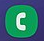

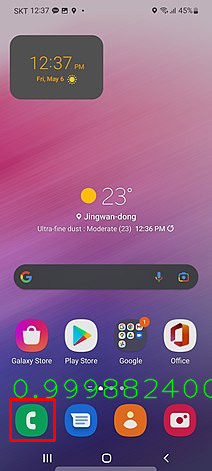

In [15]:
# TM_CCOEFF_NORMED 함수 사용 -> 1에 가까울수록 좋음
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/One_UI_4_홈화면.jpg')
template = cv2.imread('/content/스크린샷 2025-09-05 105151.png')

cv2_imshow(template)

img_draw = image.copy()
th, tw = template.shape[:2] # 템플릿 높이/넓이 가져오기

res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # 매칭 결과에서 최소/최대값이랑 좌표 추

top_left = max_loc # 최적 매칭 위치
match_val = max_val # 매칭 정확도 값

bottom_right = (top_left[0] + tw, top_left[1] + th) # 템플릿 크기만큼 바운딩 박스 지정
cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
cv2.putText(img_draw, str(match_val), top_left, cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
cv2_imshow(img_draw)

cv2.waitKey(0)
cv2.destroyAllWindows()

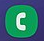

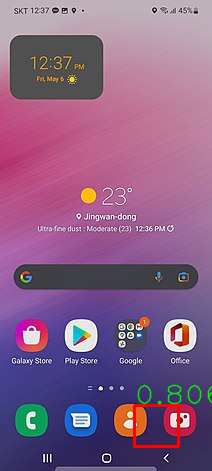

In [61]:
# SQDIFF_NORMED 함수 사용 -> 0에 가까울수록 정확하게 예측
# 밝기 변화에 민감함
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/One_UI_4_홈화면.jpg')
template = cv2.imread('//content/스크린샷 2025-09-05 105151.png')

cv2_imshow(template)

img_draw = image.copy()
th, tw = template.shape[:2]

res = cv2.matchTemplate(image, template, cv2.TM_SQDIFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
match_val = max_val

bottom_right = (top_left[0] + tw, top_left[1] + th)
cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
cv2.putText(img_draw, str(match_val), top_left, cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
cv2_imshow(img_draw)

cv2.waitKey(0)
cv2.destroyAllWindows()

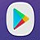

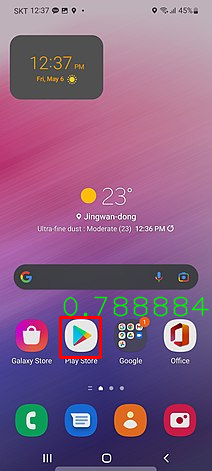

In [31]:
# TM_CCOEFF_NORMED 함수 사용
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/One_UI_4_홈화면.jpg')
template = cv2.imread('/content/스크린샷 2025-09-05 110629.png')
template_img = cv2.resize(template, (40, 40))

cv2_imshow(template_img)

img_draw = image.copy()
th, tw = template_img.shape[:2]

res = cv2.matchTemplate(image, template_img, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
match_val = max_val

bottom_right = (top_left[0] + tw, top_left[1] + th)
cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
cv2.putText(img_draw, str(match_val), top_left, cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
cv2_imshow(img_draw)

cv2.waitKey(0)
cv2.destroyAllWindows()

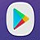

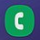

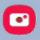

중심좌표: (80, 337)
중심좌표: (32, 420)
중심좌표: (180, 420)


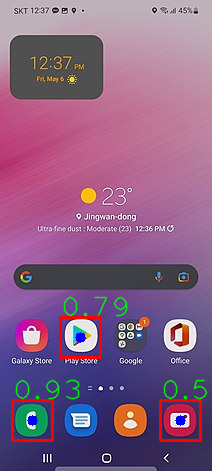

In [64]:
# 하나의 이미지에서 세개 템플릿 인식 -> 좌표 검출
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/One_UI_4_홈화면.jpg')
template = [cv2.imread('/content/스크린샷 2025-09-05 110629.png'), cv2.imread('/content/스크린샷 2025-09-05 105151.png'),cv2.imread('/content/스크린샷 2025-09-05 112641.png')]

# 템플릿 크기 조절 -> 템플릿 크기가 이미지 크기보다 크면 안되기 때문...
template_img_list = []
for t in template:
    template_img_list.append(cv2.resize(t, (40,40)))

img_draw = image.copy()

for i in template_img_list:
  cv2_imshow(i)

for i in template_img_list:
    th, tw = i.shape[:2]

    res = cv2.matchTemplate(image, i, cv2.TM_CCOEFF_NORMED)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
    match_val = max_val

    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255), 2)
    cv2.putText(img_draw, f"{match_val:.2f}", top_left,
            cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 1, cv2.LINE_AA)

    center_x = top_left[0] + tw // 2
    center_y = top_left[1] + th // 2
    center = (center_x, center_y)

    print("중심좌표:", center)
    cv2.circle(img_draw, center, 5, (255,0,0), -1)

cv2_imshow(img_draw)

cv2.waitKey(0)
cv2.destroyAllWindows()